In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer_dict = load_breast_cancer()

In [4]:
cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer_dict.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer_dict.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Exploratory data analysis

In [7]:
cancer_feature_df = pd.DataFrame(cancer_dict.data, columns=cancer_dict.feature_names)
column_names=["Target"]
cancer_target_df = pd.DataFrame(cancer_dict.target, columns= column_names )

In [8]:
cancer_feature_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# check distribution of target_class column
cancer_target_df.value_counts()

Target
1         357
0         212
dtype: int64

In [10]:
# view the percentage distribution of target_class column

cancer_target_df.value_counts()/float(len(cancer_target_df))

Target
1         0.627417
0         0.372583
dtype: float64

In [11]:
cancer_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
cancer_feature_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Explore missing values in variables


In [13]:
cancer_feature_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## **Outliers in numerical variables**

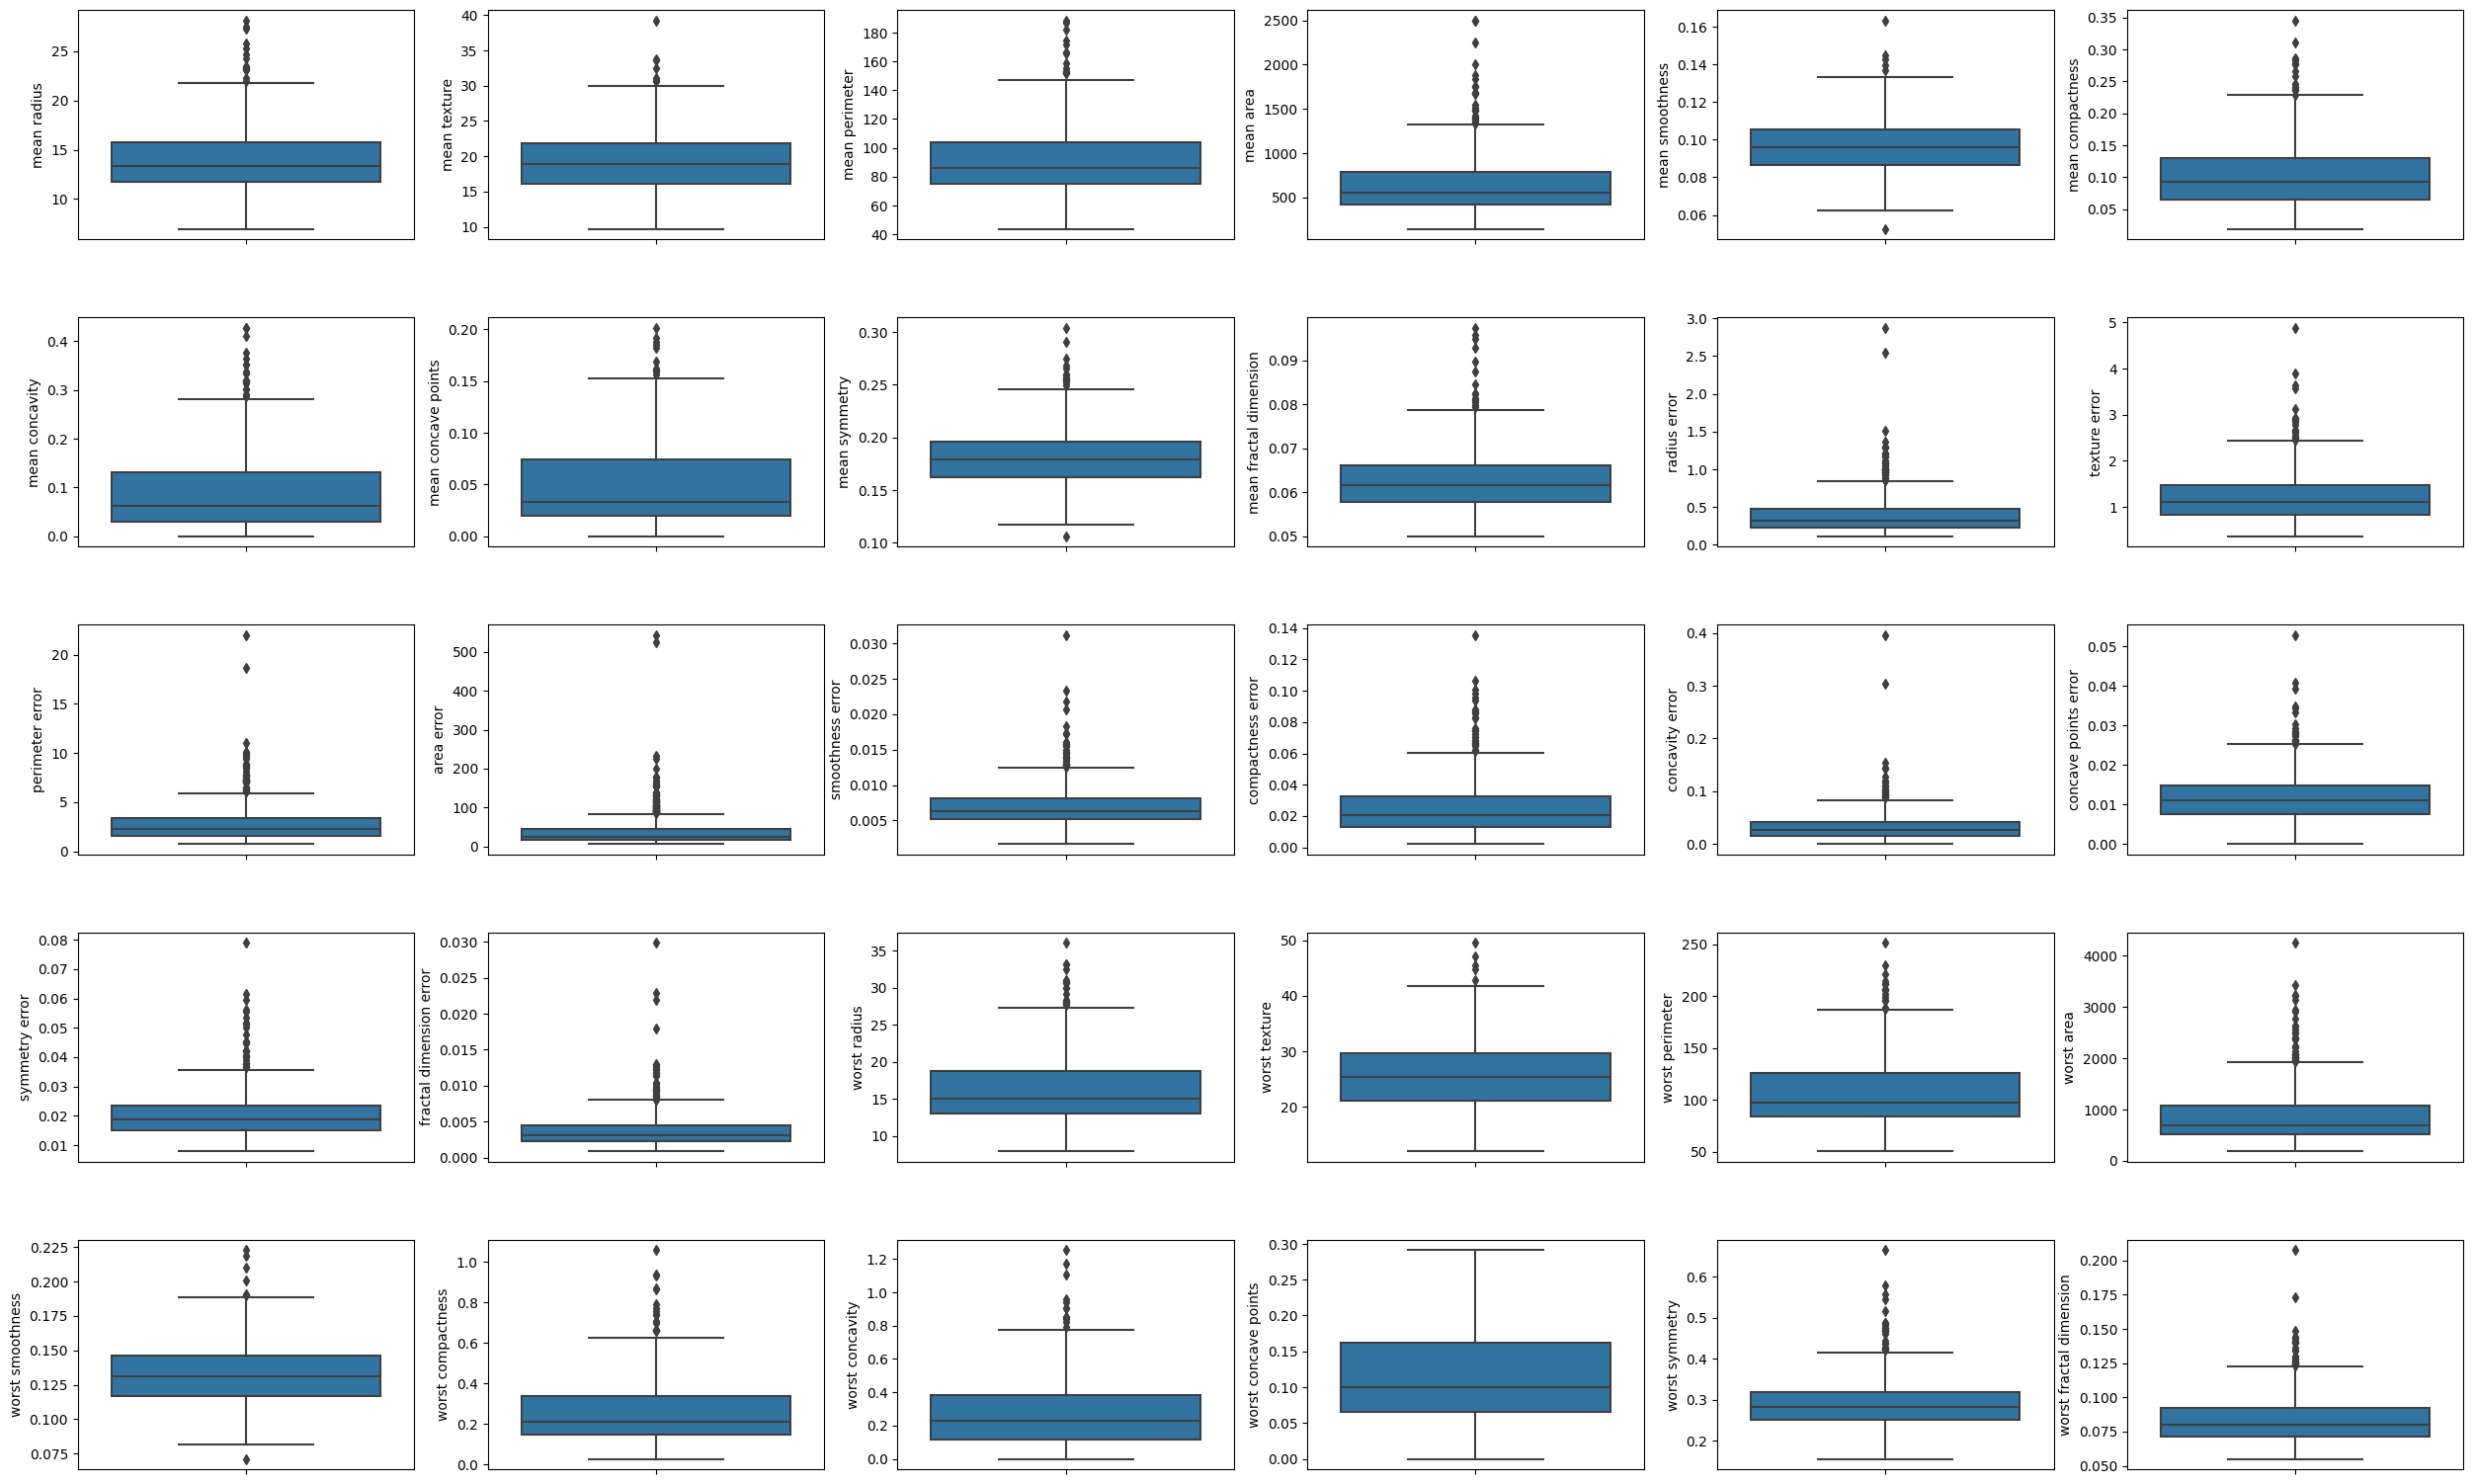

In [14]:
fig, axs = plt.subplots(ncols=6, nrows=5, figsize=(25, 15))
index = 0
axs = axs.flatten()
for k,v in cancer_feature_df.items():
    sns.boxplot(y=k, data=cancer_feature_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.6, w_pad=0.4, h_pad=5.0)

## There are 2 variants of SVMs. 


1.   Hard-margin


    *   Does not deal with outliers. 


2.   Soft-margin


    *   Can have a few points incorrectly classified


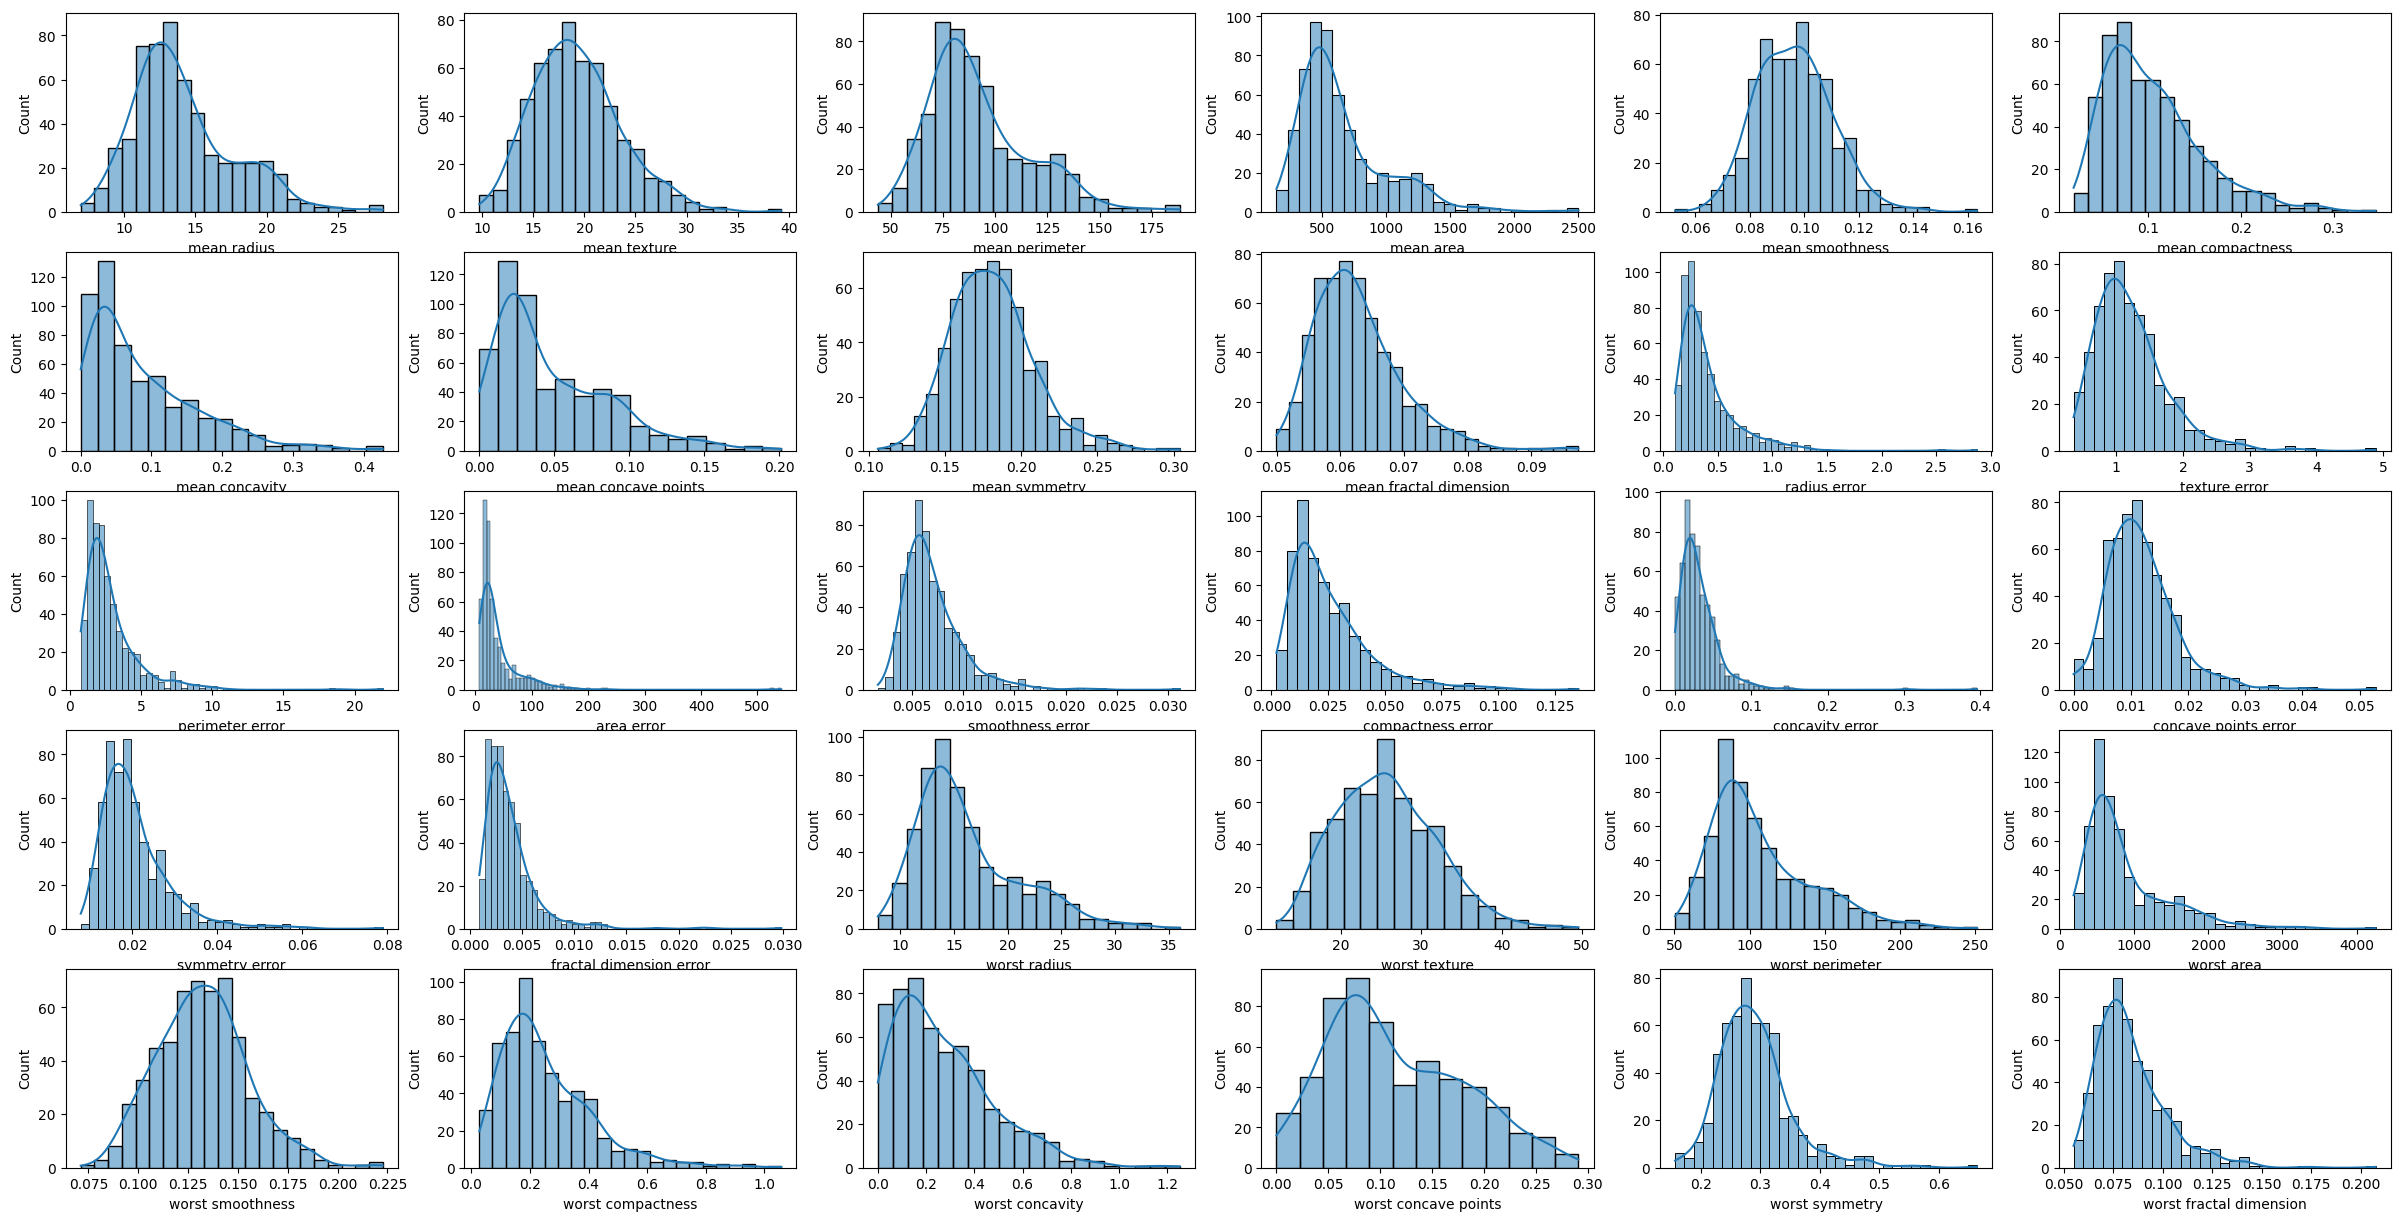

In [15]:
fig, axs = plt.subplots(ncols=6, nrows=5, figsize=(30, 15))
index = 0
axs = axs.flatten()
for k,v in cancer_feature_df.items():
    sns.histplot( data=cancer_feature_df,x=k,kde=True, ax=axs[index])
    index += 1


# Classification

In [16]:
X = cancer_feature_df
y = cancer_dict.target

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [19]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
svm_classifier = SVC()
pipe_steps = [('scaler', preprocessing.StandardScaler()), ('svc', svm_classifier)]
pipe = Pipeline(steps=pipe_steps)

In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

scoring = {"AUC": "precision", "Accuracy": make_scorer(recall_score)}

search_hyper_params = {'svc__kernel':['linear', 'rbf', 'poly'], 'svc__C': [0.01, 0.1, 1 , 8, 10 , 100, 1000], 'svc__gamma': [2, 1, 0.1, 0.01, 0.001,0.0005, 0.0001]}


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_search = GridSearchCV(pipe, search_hyper_params, cv=25, n_jobs=1, scoring=scoring, refit="AUC")


In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=25,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=1,
             param_grid={'svc__C': [0.01, 0.1, 1, 8, 10, 100, 1000],
                         'svc__gamma': [2, 1, 0.1, 0.01, 0.001, 0.0005, 0.0001],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             refit='AUC',
             scoring={'AUC': 'precision',
                      'Accuracy': make_scorer(recall_score)})

In [24]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_AUC,split1_test_AUC,...,split18_test_Accuracy,split19_test_Accuracy,split20_test_Accuracy,split21_test_Accuracy,split22_test_Accuracy,split23_test_Accuracy,split24_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,0.007189,0.000352,0.004464,0.000192,0.01,2,linear,"{'svc__C': 0.01, 'svc__gamma': 2, 'svc__kernel...",0.923077,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.996667,0.016330,56
1,0.022593,0.000187,0.005193,0.000111,0.01,2,rbf,"{'svc__C': 0.01, 'svc__gamma': 2, 'svc__kernel...",0.631579,0.631579,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.007999,0.000181,0.004433,0.000100,0.01,2,poly,"{'svc__C': 0.01, 'svc__gamma': 2, 'svc__kernel...",0.857143,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.962121,0.055215,118
3,0.007030,0.000087,0.004381,0.000119,0.01,1,linear,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.923077,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.996667,0.016330,56
4,0.020546,0.000149,0.005199,0.000073,0.01,1,rbf,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.631579,0.631579,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.007399,0.000186,0.004354,0.000132,1000,0.0005,rbf,"{'svc__C': 1000, 'svc__gamma': 0.0005, 'svc__k...",0.909091,0.923077,...,1.000000,1.0,1.0,1.000000,0.909091,1.000000,1.000000,0.979697,0.043160,106
143,0.012305,0.000125,0.004737,0.000040,1000,0.0005,poly,"{'svc__C': 1000, 'svc__gamma': 0.0005, 'svc__k...",0.705882,0.631579,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
144,0.046411,0.021117,0.004477,0.000062,1000,0.0001,linear,"{'svc__C': 1000, 'svc__gamma': 0.0001, 'svc__k...",0.909091,1.000000,...,0.909091,1.0,1.0,0.909091,0.909091,0.909091,0.909091,0.944848,0.053204,138
145,0.007423,0.000197,0.004333,0.000132,1000,0.0001,rbf,"{'svc__C': 1000, 'svc__gamma': 0.0001, 'svc__k...",0.916667,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.990000,0.027080,73


In [25]:
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

Parameters that give the best results : 

 {'svc__C': 8, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [ ]:
best_svc = SVC(C=1, gamma= 0.1, kernel='poly')
best_svc.fit(X_train, y_train)


In [ ]:
best_index_

In [ ]:
# y_train_predict= best_svc.predict(X_train)

In [ ]:
# y_predict = best_svc.predict(X_test)
#

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
print(confusion_matrix(y_train_predict, y_train))
print(confusion_matrix(y_test, y_predict))

In [ ]:
print(classification_report(y_test, y_train_predict))
print(classification_report(y_test, y_predict))